In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('PlayTennis.csv')

In [3]:
df.head(15)

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [5]:
X = df.drop('PlayTennis', axis=1).values
y = df['PlayTennis'].values

In [6]:
X

array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]])

In [7]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
def calculate_mean(data):
    return np.mean(data, axis=0)

In [10]:
def calculate_covariance_matrix(data, mean):
    n_samples = data.shape[0]
    covariance_matrix = np.dot((data - mean).T, (data - mean)) / (n_samples - 1)
    return covariance_matrix

In [11]:
def perform_eigenvalue_decomposition(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

In [12]:
def sort_eigenvectors(eigenvalues, eigenvectors):
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

In [13]:
def select_principal_components(eigenvectors, num_components):
    selected_components = eigenvectors[:, :num_components]
    return selected_components

In [14]:
def transform_data(data, selected_components):
#Transform the original data using the selected principal components.
    transformed_data = np.dot(data, selected_components)
    return transformed_data

In [15]:
def pca(data, num_components):
    # Step 1: Calculate the mean of the data
    mean = calculate_mean(data)

    # Step 2: Calculate the covariance matrix
    covariance_matrix = calculate_covariance_matrix(data, mean)

    # Step 3: Perform eigenvalue decomposition
    eigenvalues, eigenvectors = perform_eigenvalue_decomposition(covariance_matrix)

    # Step 4: Sort eigenvectors based on eigenvalues
    sorted_eigenvalues, sorted_eigenvectors = sort_eigenvectors(eigenvalues, eigenvectors)

    # Step 5: Select principal components
    selected_components = select_principal_components(sorted_eigenvectors, num_components)

    # Step 6: Transform the data
    transformed_data = transform_data(data, selected_components)

    return transformed_data

In [16]:
transformed_data = pca(X_train, 2)
print("Transformed Data:")
print(transformed_data)

Transformed Data:
[[-0.43435011  0.32234037]
 [-0.15531369 -1.11846369]
 [-0.62879229 -1.79748729]
 [-0.77530343  0.59044929]
 [-1.79062585 -1.28159142]
 [-2.09245068 -0.01211852]
 [-0.13252528 -0.94713252]
 [-2.56592928 -0.69114212]
 [-2.24776437 -1.13058221]
 [-2.06966228  0.15921265]
 [ 0.34095332 -0.26810892]]


C:\Users\prita\AppData\Local\Temp\ipykernel_12764\1099396165.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')
C:\Users\prita\AppData\Local\Temp\ipykernel_12764\1099396165.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')


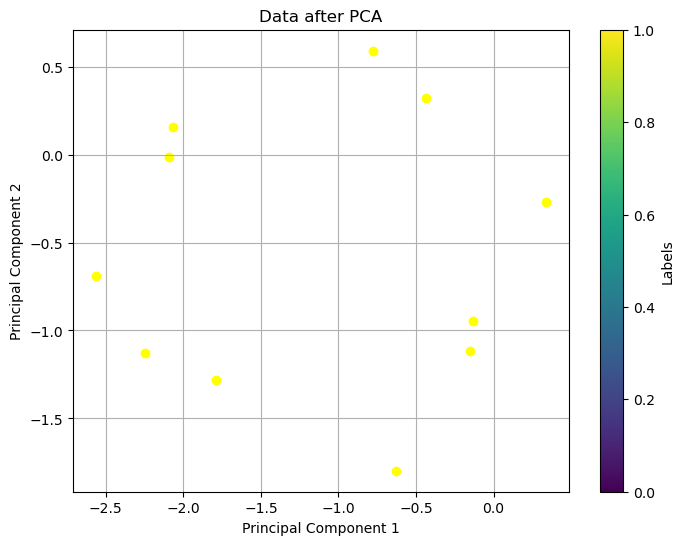

In [18]:
import matplotlib.pyplot as plt

def plot_pca_data(transformed_data, labels):
    """
    Plot the transformed data after PCA.

    Parameters:
    transformed_data (numpy.ndarray): Transformed data after PCA.
    labels (numpy.ndarray): Labels for the data points.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Data after PCA')
    plt.colorbar(label='Labels')
    plt.grid(True)
    plt.show()

# Assuming 'transformed_data' is the transformed data after PCA and 'labels' are the corresponding labels
plot_pca_data(transformed_data, y_test)
